<a href="https://colab.research.google.com/github/sruthikoyya/Deep-Learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
dataset=MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 39.1MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.32MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.29MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.15MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Its a pair ,consisting of a 28x28 px image and a  label. The image is an object of the class PIL.Image.Image which is a part of the Python imaging libary PILLOW. We can view the image within JUPYTER using matplotlib the de-facto plotting and graphing library for the science in Pyton

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

The Satement %matplot inline indicates to jupyter notebook that we want to ploat the graph within the notebook . Without this line ,Jupyter will show the image in a popup. Satement staring with % are called magic commands and are used to configure the behavior of Jupyter itself.

Lable :  5


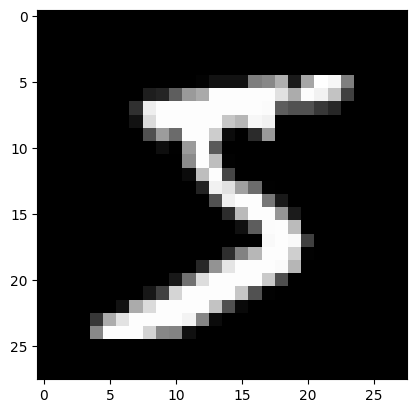

In [ ]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print("Lable : ",label)

Lable :  3


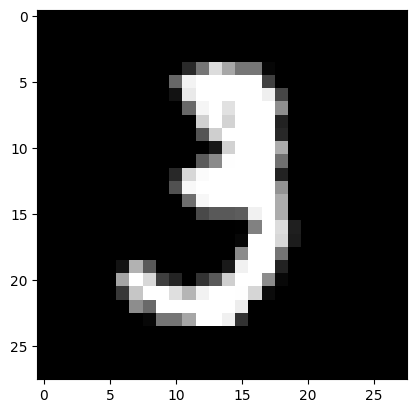

In [ ]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print("Lable : ",label)

PyTorch doesn't kow how t work wiht images.We need to convert the images into tensors. We cna do this by specifying a transform while creating out dataset.

In [ ]:
import torchvision.transforms as transforms

ToTensor transform to convert images into PyTorch tensors

In [ ]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [ ]:
img_tensor ,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The value range from 0 to 1, with 0 representing black ,1 white, and the value in betweendifferent shades of gray. We can also plot the tensor as an image using plt.imsho

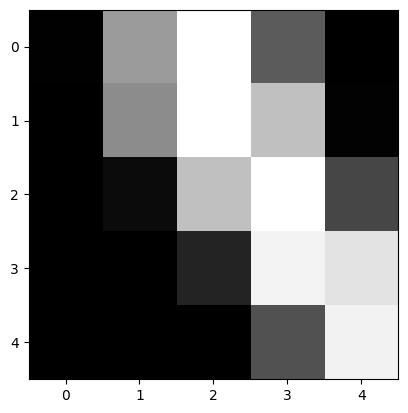

In [ ]:
#Plot the image bu passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

# Training and Validation Datasets
Training set use to tain a moded i.e computer the loss and adjust the models weights using gradient descent

Validation set used to evaluate the model during training, adjust the hyperparametets (learning rate etc) and pick the best version of the model

test set used to compate different models or approaches and report the model'd final accuracy

In [ ]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

We can now create data loaders to help us to load the data in batches. We'll use a batch size of 128

In [ ]:
from torch.utils.data import DataLoader
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)

We set shuffle =True for the training data loader to ensure that the  batches generated in each epoch are different. This randomization helps generalize and speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images

In [ ]:
import torch.nn as nn

input_size=28*28
num_classes=10

#Logistic regression model
model=nn.Linear(input_size,num_classes)

Our model is a lot larger because the input parameters are 28*28

Let's take a look at the weights and biases



In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0244,  0.0214, -0.0232,  ..., -0.0191, -0.0064, -0.0045],
        [-0.0233,  0.0220, -0.0338,  ..., -0.0180,  0.0019,  0.0112],
        [ 0.0045,  0.0319,  0.0202,  ..., -0.0294, -0.0266,  0.0052],
        ...,
        [ 0.0341, -0.0108,  0.0265,  ...,  0.0162,  0.0054,  0.0156],
        [ 0.0187,  0.0213, -0.0216,  ..., -0.0093,  0.0231,  0.0227],
        [ 0.0173, -0.0238,  0.0282,  ..., -0.0196, -0.0204, -0.0218]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0324,  0.0091, -0.0157, -0.0326,  0.0193,  0.0270,  0.0133,  0.0084,
        -0.0079,  0.0199], requires_grad=True)

Athough there are a total 7850 parameters here, conceptually ,nothing has changed so far. Let's try and generate some output using out model. We'll take the first batch of 100 images from out dataset and pass them into out model

In [ ]:
'''
for images,labels in train_loader:
  print(labels)
  print(images.shape)
  outputs =model(images)
  print(outputs)
  break
  '''


tensor([5, 2, 7, 8, 8, 2, 1, 0, 3, 1, 9, 1, 1, 1, 1, 1, 1, 6, 1, 2, 7, 9, 9, 7,
        7, 7, 6, 7, 6, 4, 8, 8, 8, 2, 1, 4, 2, 1, 3, 4, 5, 1, 0, 4, 4, 1, 3, 6,
        4, 5, 9, 7, 7, 9, 4, 6, 1, 8, 5, 8, 9, 3, 6, 0, 0, 7, 8, 2, 7, 0, 1, 4,
        2, 6, 1, 1, 7, 3, 6, 1, 6, 3, 6, 3, 0, 2, 2, 3, 3, 6, 5, 7, 6, 9, 3, 6,
        4, 7, 0, 3, 6, 2, 8, 1, 7, 8, 1, 1, 4, 1, 1, 5, 1, 0, 1, 7, 7, 7, 5, 6,
        4, 4, 7, 5, 0, 5, 9, 8])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

The code above leads to an error because our input data does not have the right shape . Our images are of the shape 1x28x28, but we need them to be vector of size 784 , i.e we need to flatten them. We'll use the .reshape method of a tensor , which will allow us to efficiently 'view' each image as a flat vector without relly creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the nn.Module class from PyTorch

A Class in python provides a bluprint for creating objects.


In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)
  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out
model=MnistModel()

Inside the __init__ constructor method, we instantiate the weights and biases using nn.Linear . And inside the forward method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into self.linear

xb.reshape(-1,28*28) indicates to PyTorch that we want a view of the xb tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e 784) . One argument to .reshape can be set to -2 (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has .weight and .bias attributes(as they are now inside the .linear attribute),but it does have a .parameters method that returns a list containing the weights and bias.

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0296,  0.0186,  0.0208,  ..., -0.0247,  0.0342, -0.0286],
         [ 0.0048, -0.0166, -0.0319,  ...,  0.0236, -0.0349,  0.0264],
         [-0.0302,  0.0256, -0.0178,  ..., -0.0122, -0.0217, -0.0160],
         ...,
         [ 0.0028,  0.0239,  0.0269,  ...,  0.0267,  0.0289,  0.0225],
         [-0.0328, -0.0013, -0.0301,  ...,  0.0023, -0.0103, -0.0284],
         [-0.0218,  0.0331, -0.0282,  ...,  0.0242,  0.0041, -0.0194]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0161, -0.0100,  0.0004,  0.0293,  0.0240, -0.0299,  0.0240, -0.0016,
         -0.0216, -0.0352], requires_grad=True)]

we can use out new custom model in the same way as before.

In [ ]:
for images,labels in train_loader:
  outputs=model(images)
  break
print("Outputs.shape:  ",outputs.shape)
print("Sample outptus  :\n",outputs[:2].data)

Outputs.shape:   torch.Size([128, 10])
Sample outptus  :
 tensor([[ 0.0391,  0.2454,  0.1427, -0.2431,  0.2186, -0.0317,  0.2593, -0.1148,
         -0.1914,  0.0758],
        [ 0.1361,  0.4314, -0.2849, -0.3485, -0.0291, -0.0748, -0.1340,  0.0658,
         -0.0430,  0.3409]])


For each of the 100 input images we get 10 outputs ,one  for each class. As discussed earlier, we'd like these outputs to represets probabilities. Each output row's elements must lie between 0 to 1 and add up to 1 , which is not the case.

To convert the output into probabilities ,we use the softmax function.

In [ ]:
 import torch.nn.functional as F

In [ ]:
# Apply softmax for each output row

probs=F.softmax(outputs, dim=1)

# sample probabilities
print('Sample probabilities :\n',probs[:2].data)

# Add up the probabilities of an output row

print("Sum :",torch.sum(probs[0]).item())

Sample probabilities :
 tensor([[0.0985, 0.1210, 0.1092, 0.0743, 0.1178, 0.0917, 0.1227, 0.0844, 0.0782,
         0.1021],
        [0.1107, 0.1488, 0.0727, 0.0682, 0.0939, 0.0897, 0.0845, 0.1032, 0.0926,
         0.1359]])
Sum : 0.9999999403953552


Finally we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using torch.max, which returns  each row's largest element and the corresponding index

In [ ]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([6, 1, 9, 1, 9, 7, 9, 9, 4, 0, 0, 0, 0, 9, 1, 5, 1, 1, 9, 1, 9, 1, 1, 9,
        0, 1, 9, 8, 5, 9, 1, 9, 0, 9, 0, 9, 1, 9, 6, 1, 6, 1, 0, 1, 1, 6, 8, 7,
        1, 0, 9, 1, 1, 9, 0, 0, 6, 9, 9, 0, 9, 1, 0, 1, 0, 0, 7, 9, 9, 1, 1, 6,
        6, 6, 0, 1, 1, 9, 7, 9, 1, 9, 0, 1, 9, 1, 9, 8, 4, 4, 4, 9, 9, 1, 1, 6,
        0, 1, 1, 0, 0, 9, 1, 9, 9, 6, 0, 0, 0, 2, 8, 9, 1, 0, 0, 1, 0, 5, 0, 1,
        4, 9, 1, 6, 9, 1, 0, 0])
tensor([0.1227, 0.1488, 0.1243, 0.1227, 0.1144, 0.1221, 0.1381, 0.1296, 0.1271,
        0.1234, 0.1389, 0.1441, 0.1215, 0.1321, 0.1400, 0.1182, 0.1456, 0.1275,
        0.1203, 0.1381, 0.1320, 0.1540, 0.1361, 0.1272, 0.1378, 0.1341, 0.1255,
        0.1284, 0.1296, 0.1702, 0.1515, 0.1560, 0.1634, 0.1408, 0.1524, 0.1466,
        0.1268, 0.1245, 0.1126, 0.1225, 0.1309, 0.1255, 0.1438, 0.1299, 0.1199,
        0.1628, 0.1265, 0.1206, 0.1308, 0.1216, 0.1654, 0.1182, 0.1426, 0.1331,
        0.1383, 0.1242, 0.1074, 0.1398, 0.1387, 0.1675, 0.1200, 0.1215, 0.1687,
       

In [ ]:
labels

tensor([6, 0, 1, 9, 5, 7, 2, 5, 6, 5, 3, 9, 5, 5, 6, 1, 5, 6, 3, 6, 2, 7, 4, 2,
        8, 6, 8, 7, 8, 5, 6, 6, 3, 8, 6, 2, 8, 5, 7, 6, 3, 2, 2, 2, 1, 5, 3, 9,
        6, 9, 0, 1, 4, 6, 5, 8, 4, 7, 2, 8, 1, 9, 0, 6, 8, 8, 5, 9, 5, 4, 8, 4,
        5, 5, 9, 4, 6, 9, 4, 1, 5, 9, 5, 9, 9, 6, 5, 7, 4, 2, 2, 5, 0, 7, 6, 5,
        1, 6, 8, 7, 2, 7, 0, 8, 0, 5, 3, 5, 6, 1, 7, 1, 9, 9, 9, 3, 4, 0, 2, 8,
        3, 4, 1, 7, 9, 6, 2, 6])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to trian the model, i.e adjust the weights using gradient descent to make better predictions

# Evaluation Metric and Loss Function


Just as with linear regresion we need a way to evaluate how well our model is performing . A natural way do this would be to find the percentage of labels that were predicted correctly, i.e the accuracy of the prediction

In [ ]:
outputs

tensor([[ 0.0391,  0.2454,  0.1427,  ..., -0.1148, -0.1914,  0.0758],
        [ 0.1361,  0.4314, -0.2849,  ...,  0.0658, -0.0430,  0.3409],
        [ 0.1289, -0.0224,  0.0959,  ..., -0.1290, -0.3953,  0.2174],
        ...,
        [ 0.2431,  0.3412, -0.1385,  ..., -0.0180, -0.0654,  0.1055],
        [ 0.2521,  0.0573,  0.1135,  ..., -0.1925, -0.2516,  0.0119],
        [ 0.3744,  0.0884, -0.0300,  ...,  0.0010, -0.1099,  0.0587]],
       grad_fn=<AddmmBackward0>)

In [ ]:
outputs[:2]

tensor([[ 0.0391,  0.2454,  0.1427, -0.2431,  0.2186, -0.0317,  0.2593, -0.1148,
         -0.1914,  0.0758],
        [ 0.1361,  0.4314, -0.2849, -0.3485, -0.0291, -0.0748, -0.1340,  0.0658,
         -0.0430,  0.3409]], grad_fn=<SliceBackward0>)

In [ ]:
preds==labels

tensor([ True, False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False,  True, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False,  True, False, False, False])

In [ ]:
torch.sum(preds== labels)

tensor(12)

In [ ]:
torch.sum(preds == labels).item()

12

In [ ]:
torch.sum(preds == labels).item()/len(preds)

0.09375

In [ ]:
torch.tensor(torch.sum(preds == labels).item()/len(preds))

tensor(0.0938)

In [ ]:
def accuracy(outputs, labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [ ]:
accuracy(outputs,labels)

tensor(0.0938)

In [ ]:
probs

tensor([[0.0985, 0.1210, 0.1092,  ..., 0.0844, 0.0782, 0.1021],
        [0.1107, 0.1488, 0.0727,  ..., 0.1032, 0.0926, 0.1359],
        [0.1138, 0.0978, 0.1101,  ..., 0.0879, 0.0674, 0.1243],
        ...,
        [0.1224, 0.1350, 0.0836,  ..., 0.0943, 0.0899, 0.1066],
        [0.1324, 0.1090, 0.1153,  ..., 0.0849, 0.0800, 0.1041],
        [0.1406, 0.1056, 0.0939,  ..., 0.0968, 0.0866, 0.1026]],
       grad_fn=<SoftmaxBackward0>)

Unlike accuracy, cross entropy is a continuous and differnetiable function. It is also provides useful feedback for incremental improvements in the model(a slightly probability for the correct label leads to a lower loss). These two factors make cross- entropy a better choice for the loss function.

moreover is also performs softmax internally, so we can directly pass in the model's output without converting them into probabilities

In [ ]:
loss_fn=F.cross_entropy

In [ ]:
#Loss for current batch of data
loss=loss_fn(outputs,labels)
print(loss)

tensor(2.3178, grad_fn=<NllLossBackward0>)


we know that cross_entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. therefore ,one way to interpret the resulting number e.g 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. the lower the loss the better the model

# Training the model


Pseudocode

In [ ]:
''' pseudocode
for epoch in range(num_epochs):
  #Training phase

  for batch in train_loader:
    #generate predictions
    #calculate loss
    #compute gradients
    #update weights
    #reset gradients

  #Validation Phase
  for  batch in val_loader:
    pass
    #generate predicitons
    #calculate loss
    #calculate metrics(accuracy etc.)

#Calculate average validation loss & metrics

#Log epoch, loss & metric for inspection
'''

' pseudocode\nfor epoch in range(num_epochs):\n  #Training phase\n\n  for batch in train_loader:\n    #generate predictions\n    #calculate loss\n    #compute gradients\n    #update weights\n    #reset gradients\n\n  #Validation Phase\n  for  batch in val_loader:\n    pass\n    #generate predicitons\n    #calculate loss\n    #calculate metrics(accuracy etc.)\n\n#Calculate average validation loss & metrics\n\n#Log epoch, loss & metric for inspection\n'

we'll include the problem-independent parts within a function called for which will be used to train the model . The problem_specific parts will be implemented by adding new methods to the nn.Module class

In [ ]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  optimizer=opt_func(model.parameters(),lr)
  history=[] #for recording epoch-wise results

  for epoch in range(epochs):

    #Training phase
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    #Validation Phase
    result=evaluate(model,val_loader)
    model.epoch_end(epoch,result)
    history.append(result)
  return history


The fir function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

Configuration like batch size, learning rate ,etc (called hyperparameters),need to picked in advanced while training machien learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. It is an active are of research and experimentation in machine learning .

evaluate function used in the calidation pahse of fit

In [ ]:
def evaluate(model,val_loader):
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

Finally redefine the MnistModel class to include additional methods training_step,validation_step,validation_epoch_end and epoch_end used by fit and evaluate

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out =self.linear(xb)
    return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images)   #generate predictions
    loss=F.cross_entropy(out,labels)#Calculate loss
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images) #Generate predictions
    loss=F.cross_entropy(out,labels) #Calculate loss
    acc=accuracy(out,labels) #Calculate accuracy
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean() #combine losses
    batch_accs=[x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean() # Combine accuracies
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch[{}],val_loss: {:.4f},val_acc: {:.4f}".format(epoch,result['val_loss'],result['val_acc']))
model=MnistModel()







In [ ]:
result0=evaluate(model,val_loader)
result0

{'val_loss': 2.331899881362915, 'val_acc': 0.0670490488409996}

Train the model. for 5 epochs and loot at the results

In [ ]:
history=fit(5,0.001,model,train_loader,val_loader)

Epoch[0],val_loss: 1.9583,val_acc: 0.6051
Epoch[1],val_loss: 1.6874,val_acc: 0.7307
Epoch[2],val_loss: 1.4856,val_acc: 0.7715
Epoch[3],val_loss: 1.3331,val_acc: 0.7896
Epoch[4],val_loss: 1.2157,val_acc: 0.8008


In [ ]:
history2=fit(5,0.001,model,train_loader,val_loader)

In [ ]:
history3=fit(5,0.001,model,train_loader,val_loader)

In [ ]:
history4=fit(5,0.001,model,train_loader,val_loader)

While the ccuracy continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

In [ ]:
history=[result0]+history+history2+history3+history4
accuracies=[result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');


# Testing with individual images

While we have been tracking the overall accuracyof a model so far,it's  also a good idea to look at model's result on some sample images. Let's test out our model with some images from the predefined test dataset of 10000images. We begin by recreating the test dataset with the ToTensor transform

In [ ]:

#define test Dataset
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor())

sample image from the dataset



In [ ]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape:',img.shape)
print('Label:',label)

Let's define a helper function predict_image, which return the predict_image which return the predicted label for a single image tensor.

In [ ]:
 img.unsqueeze(0).shape


In [ ]:
def predict_image(img,model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()

img.unsqueeze simply adds another dimension at the beginging of the 1x28x28 tensor ,making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.


let's try it out with a  few images

In [ ]:
img, label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print("Label :",label,"Predicted: ",predict_image(img,model))

In [ ]:
img, label=test_dataset[10]
plt.imshow(img[0],cmap='gray')
print("Label :",label,"Predicted: ",predict_image(img,model))

In [ ]:
img, label=test_dataset[265]
plt.imshow(img[0],cmap='gray')
print("Label :",label,"Predicted: ",predict_image(img,model))

In [ ]:
img, label=test_dataset[193]
plt.imshow(img[0],cmap='gray')
print("Label :",label,"Predicted: ",predict_image(img,model))

In [ ]:
img, label=test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print("Label :",label,"Predicted: ",predict_image(img,model))

Identifying where our model performs poorly can help us improve the model , by collecting more training data, increasing/decreasing the complexity of the model , and changing the hyperparameters.

As a final step,let's also look at the overall loss and accuracy of the model on the test set

In [ ]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model,test_loader)
result

We exect this to be similar to the accuracy/loss on the validation set. If not ,we might need a better validation set that has similar data and distribution as the test set(which often comes from real world data).

# Saving and loading the model

Since we've trained our model for a long time and achieved a reasonable accuracy, it would be a good idea to save the weights and bias matrics to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [ ]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [ ]:
model.state_dict()

To load the model weights we can instante a new object of the class MnistModel and use the .load_state_dict method

In [ ]:
model2=MnistModel()


In [ ]:
model2.state_dict()

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before

In [ ]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model2,test_loader)
result